# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [48]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [6]:
# Your code here
data=pd.read_csv('data_all.zip')

In [19]:
data.head(10)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
print(len(list(sorted(data.e.unique()))))
print(list(sorted(data.e.unique())))

62
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0]


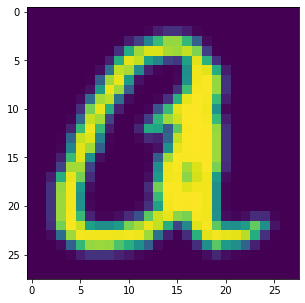

In [34]:
plt.figure(figsize=(5,5))
plt.imshow(data.values[0,1:].reshape(28,28))  
plt.show()

In [35]:
data['Numero']=[1 if i<10 else 0 for i in data.e]
data['Mayuscula']=[1 if 36>i>9 else 0 for i in data.e]
data['Minuscula']=[1 if i>35 else 0 for i in data.e]

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [45]:
# Your code here
XU_train,XU_test,yU_train,yU_test=train_test_split(data.drop(['Numero','Mayuscula','Minuscula'],axis=1),
                                              data['Mayuscula'],test_size=0.2,random_state=42)
neis = neighbors.KNeighborsClassifier()
neis.fit(XU_train, yU_train)
neis.score(XU_test,yU_test)

0.8562217923920051

In [49]:
yU_pred=neis.predict(XU_test)

In [57]:
display(len(pd.DataFrame(yU_pred,yU_test)))
pd.DataFrame(yU_pred,yU_test)[pd.DataFrame(yU_pred,yU_test).index==pd.DataFrame(yU_pred,yU_test)[0]]

23265

,0
Mayuscula,
0,0
0,0
1,1
1,1
0,0
...,...
0,0
0,0
0,0


* Try to do the same thing with lowercases.

In [58]:
# Your code here
Xl_train,Xl_test,yl_train,yl_test=train_test_split(data.drop(['Numero','Mayuscula','Minuscula'],axis=1),
                                              data['Minuscula'],test_size=0.2,random_state=42)
neis2 = neighbors.KNeighborsClassifier()
neis2.fit(Xl_train, yl_train)
display(neis2.score(Xl_test,yl_test))
yl_pred=neis2.predict(Xl_test)
display(len(pd.DataFrame(yl_pred,yl_test)))
pd.DataFrame(yl_pred,yl_test)[pd.DataFrame(yl_pred,yl_test).index==pd.DataFrame(yl_pred,yl_test)[0]]

0.8806791317429615

23265

,0
Minuscula,
1,1
0,0
0,0
0,0
1,1
...,...
1,1
0,0
0,0


* Try to do the same thing with numbers.

In [59]:
# Your code here
Xn_train,Xn_test,yn_train,yn_test=train_test_split(data.drop(['Numero','Mayuscula','Minuscula'],axis=1),
                                              data['Numero'],test_size=0.2,random_state=42)
neis3 = neighbors.KNeighborsClassifier()
neis3.fit(Xn_train, yn_train)
display(neis3.score(Xn_test,yn_test))
yn_pred=neis3.predict(Xn_test)
display(len(pd.DataFrame(yn_pred,yn_test)))
pd.DataFrame(yn_pred,yn_test)[pd.DataFrame(yn_pred,yn_test).index==pd.DataFrame(yn_pred,yn_test)[0]]

0.8796045562003009

23265

,0
Numero,
0,0
1,1
0,0
0,0
0,0
...,...
0,0
1,1
1,1
